# Logistic regression
The goal of logistic regression is to classify data using a trained model. Logistic regression is a simple algorithm that does not require a lot of computational power (in contrast to techniques like support vector machines) whilest often perform as well (or even better) than more complex models. Besides just assigning a class, it also calculates the probabilities allowing us to see how confident the model is in a decission.

The goals of this exercise are
* Correctly training and tuning a logistic regression classifier
* Performing classification via logistic regression
* Perform feature engineering
* Interpretting the different performance metrics like accuracy, recall, precision, f1-score, ROC
* Know when you're dealing with under- and overfitting and the ability to make adaptions regarding this


In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt                        # To create plots
import numpy as np                                     # To perform calculations quickly
import pandas as pd                                    # To load in and manipulate data
from sklearn.linear_model import LogisticRegression    # Linear model
from sklearn.model_selection import train_test_split   # Split up the data in a train and test set
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score,f1_score 
from sklearn.metrics import roc_curve,auc
import seaborn as sns


## Breastcancer dataset

https://www.kaggle.com/pranaykankariya/breastcancer-dataset

Target column: diagnosis (Malign or Benign)

In [2]:
# Read in the data
os.getcwd()
data = pd.read_csv("./data/breast_cancer.csv")
# Take a look at the first rows
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Summarize the dataset
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


<Axes: xlabel='diagnosis', ylabel='count'>

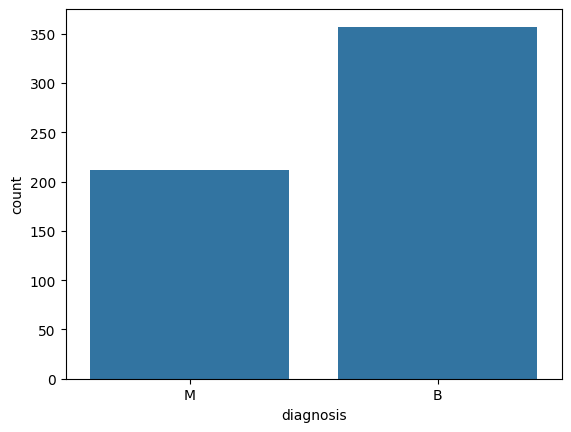

In [4]:
# Create a countplot to determine if the classes are balanced
sns.countplot(data=data, x='diagnosis')

In [5]:
# Remove uninformative columns (look at the summary and first rows to determine which columns you should remove)
data.drop("Unnamed: 32", axis=1, inplace=True)

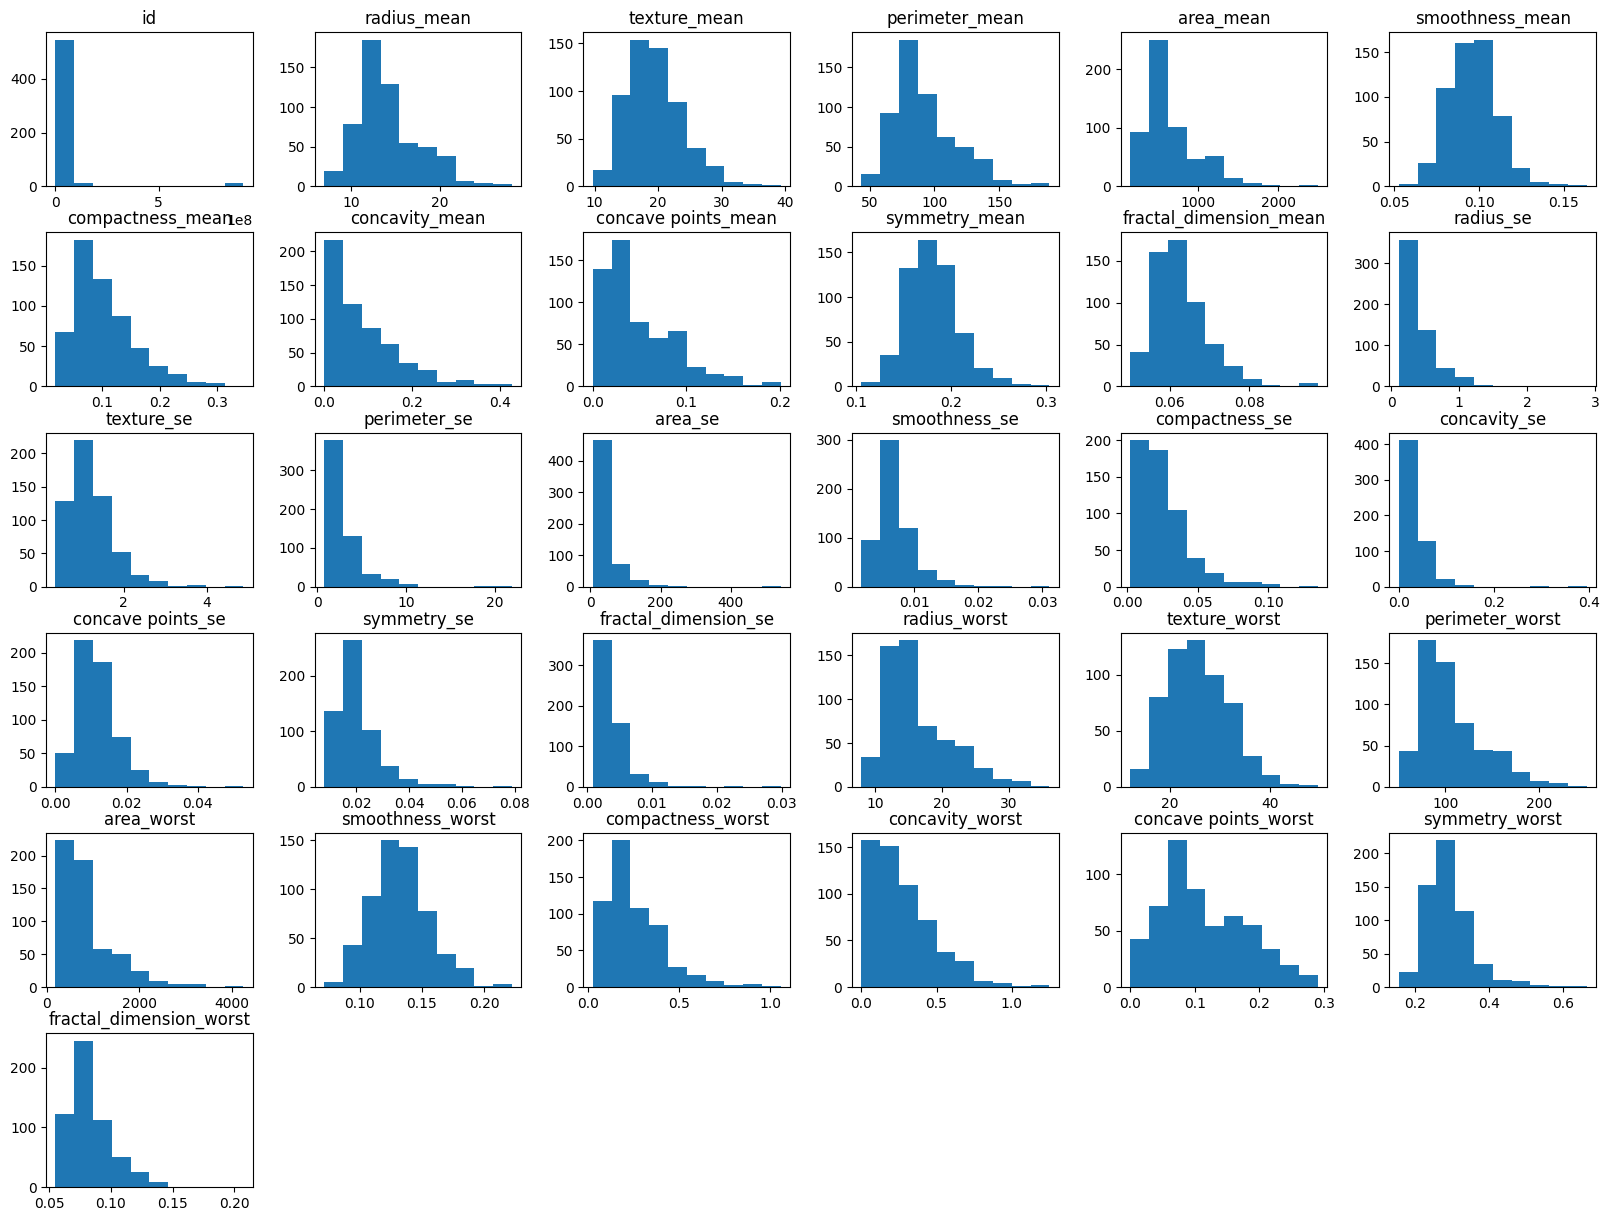

In [6]:
# Create a histogram plot of the different features
# This can be done using the pandas hist function.
# => my_df.hist()
# To increase the size of the figure, you can pass a figsize tupple. (20,15) works good. You can also hide the grid
# with the option "grid=False"
# => my_df.hist(figsize=(20,15),grid=False)
#To hide the plot information you can assign it to a variable, or add a ";" at the end (other options exist)
# => plot = my_df.hist(figsize=(20,15),grid=False)         or       my_df.hist(figsize=(20,15),grid=False);
hist_plot = data.hist(figsize=(20,15), grid=False)

In [7]:
# Split data into features and targets (or X, y depending on your preference)
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]


In [8]:
# Split data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [9]:
# Scale the data, use a scaler. You can base your choice on the histogrammes above, or by just trying them out 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[0,:]

array([-0.23317811, -1.15036482, -0.39064196, -1.12855021, -0.95876358,
        0.3109837 , -0.5959945 , -0.80259612, -0.80249002,  0.29453906,
        0.0942515 , -0.4950523 ,  1.48720153, -0.51448782, -0.49154005,
        0.28149837, -0.60451206, -0.46900701, -0.61170002,  0.05798237,
       -0.35763702, -1.0431756 ,  0.21353282, -1.0360446 , -0.84880771,
        0.34249851, -0.73009743, -0.81232053, -0.75798367, -0.01614761,
       -0.38503402])

In [10]:
# Initialize a logistic regression model, fit the data. Start with a C-value of 1
model = LogisticRegression(C=1) 
model.fit(X_train_scaled,y_train)

LogisticRegression(C=1)

### Model evaluation
In the next section we will evaluate our model using different metrics

Score of the model on the testset 0.9649122807017544
[[65  2]
 [ 2 45]]
True Positives: 45, False Positives: 2, True Negatives: 65, False Negatives: 2


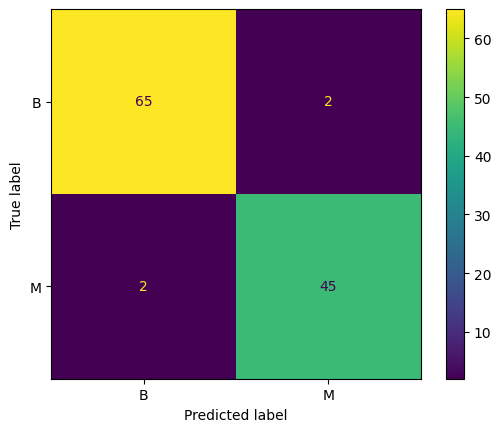

              precision    recall  f1-score   support

           B       0.97      0.97      0.97        67
           M       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [11]:
# Predict values for the test set
diagnosis = model.predict(X_test_scaled)
# print(diagnosis)

# Check if you have over- or underfitting of your model by comparing the score of the training and test set
print("Score of the model on the testset", model.score(X_test_scaled, y_test))

# Look at the confusion matrix, what do the different values mean in this case?
# Hint: if you don't know the syntax/meaning for a specific funtion, you can always look this up
# in jupyter notebook by executing "?function_name"
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,recall_score,precision_score,f1_score
print(cf:=confusion_matrix(y_test,diagnosis))
tn, fp, fn, tp = cf.ravel()
print(f"True Positives: {tp}, False Positives: {fp}, True Negatives: {tn}, False Negatives: {fn}")
matrix = ConfusionMatrixDisplay(cf,display_labels=["B","M"])
matrix.plot()
plt.show()
# Show the accuracy, recall, precision and f1-score for the test set
# Note, sometimes you need to supply a positive label (if not working with 0 and 1)
# supply this with "pos_label='label'", in this case, the malign samples are the positives
from sklearn.metrics import classification_report
print(classification_report(y_test, diagnosis))

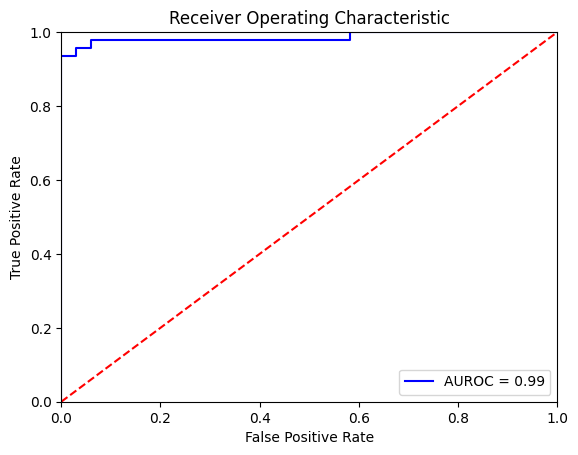

In [12]:
# Make a roc curve, also show the AUROC
# calculate the fpr and tpr for all thresholds of the classification
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test_scaled)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label="M")
roc_auc = metrics.auc(fpr, tpr)

# Plot the roc curce
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUROC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Try some different C-values for the model. E.g. 0.0001 and 1000

What do you see in the metrics? what does this mean?


## Wine dataset
https://archive.ics.uci.edu/ml/datasets/Wine
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

The feature of interest is "cultivar"

In [13]:
# Read in the data
wine_data = pd.read_csv("./data/wine.csv")
# Take a look at the first rows
wine_data.head()

,cultivar,alcohol,malic_acid,ash,alcalinity,magnesium,phenols_total,phenols_flavanoids,phenols_nonflavanoids,proanthocyanins,color_intensity,hue,OD280/OD315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<Axes: xlabel='cultivar', ylabel='count'>

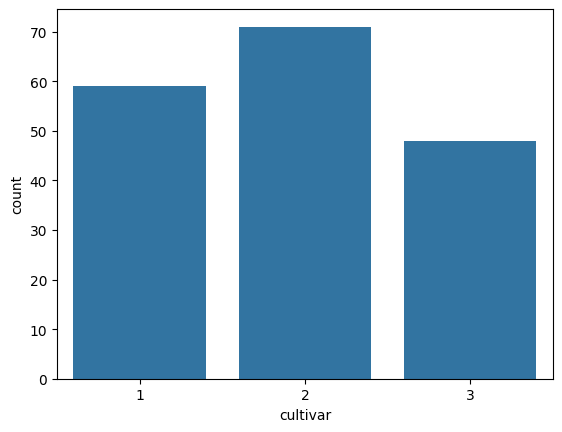

In [14]:
# Show a summary of the data
wine_data.describe()
sns.countplot(data=wine_data, x='cultivar')

In [15]:
# split into features and targets (X and y)
X = wine_data.drop("cultivar", axis=1)
y = wine_data["cultivar"]

In [16]:
# split into train and test set, keep about 20% of the data to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [17]:
# scale/normalize the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[0,:]

array([ 0.87668336,  0.79842885,  0.64412971,  0.12974277,  0.48853231,
       -0.70326216, -1.42846826,  1.0724566 , -1.36820277,  0.35193216,
        0.0290166 , -1.06412236, -0.2059076 ])

Score of the model on the testset 1.0
Score of the model on the trainingset 1.0
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


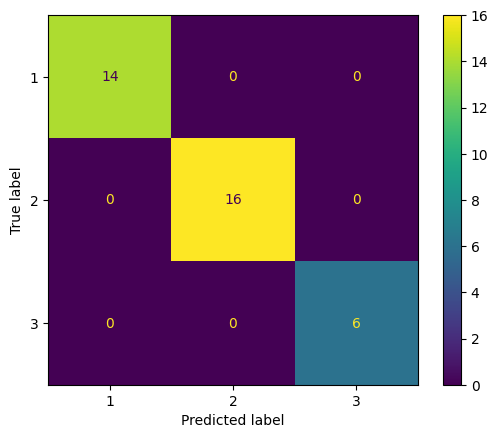

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

If you want to print each score separetely, you need to add the argument average=None
[1. 1. 1.]


In [26]:
# Create a model
model = LogisticRegression()
model.fit(X_train_scaled,y_train)
# Check if you have over- or underfitting of your model by comparing the score of the training and test set
print("Score of the model on the testset", model.score(X_test_scaled, y_test))
print("Score of the model on the trainingset", model.score(X_train_scaled, y_train))

# Predict values for the test set
prediction = model.predict(X_test_scaled)

# Look at the confusion matrix, what do the different values mean in this case
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,recall_score,precision_score,f1_score
print(cf:=confusion_matrix(y_true=y_test,y_pred=prediction))
matrix = ConfusionMatrixDisplay(cf,display_labels=[1,2,3])
matrix.plot()
plt.show()
# Show the accuracy, recall, precision and f1-score for the test set
# Note, since we have multiple classes, we have to provide an average parameter to recall, precision and f1-score
# Using average=None will result in the scores for all classes. To know which classes correspond to which values,
# you can take a look at model.classes_
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))
print("If you want to print each score separetely, you need to add the argument average=None")
print(precision_score(y_test, prediction, average=None))